#Simulación de Montecarlo

En literatura en inglés puedes ver términos como _Montecarlo Sampling_ o _Montecarlo simulation_ usados indistintamente.

Los métodos de Monte Carlo son algoritmos que utilizan muestreo aleatorio repetido para obtener resultados numéricos en problemas físicos y matemáticos. Estos métodos son útiles cuando otros enfoques no son posibles, y se aplican en optimización, integración numérica y generación de muestras probabilísticas.

En física, son útiles para simular sistemas complejos como fluidos y materiales desordenados. También se aplican en situaciones inciertas, como el cálculo de riesgos en negocios, y en matemáticas para resolver integrales multidimensionales con condiciones complicadas.

El principio de los métodos de Monte Carlo puede usarse en problemas probabilísticos. Utilizan muestreo de variables aleatorias para aproximar integrales y distribuciones.

Aunque son conceptualmente sencillos, las simulaciones de Monte Carlo pueden ser computacionalmente costosas. Para problemas complejos, se requieren muchas muestras, lo que puede llevar a largos tiempos de ejecución.


### El método

El método de Monte Carlo es flexibles, pero tienden a mantener un patrón particular:

- Definir un dominio de posibles entradas.
- Generar entradas al azar a partir de una distribución de probabilidad en el dominio.
- Realizar un cálculo determinista en las entradas.
- Agregar los resultados.


### Breve historia
Las simulaciones antes del método de Monte Carlo se basaban en problemas deterministas con muestreo estadístico para estimar incertidumbres. Sin embargo, las simulaciones de Monte Carlo resuelven estos problemas utilizando metaheurísticas probabilísticas.

El método tuvo sus inicios con el problema de la aguja de Buffon para estimar π y fue utilizado experimentalmente por Enrico Fermi en la década de 1930. La forma moderna fue ideada por Stanislaw Ulam en la década de 1940 en el Laboratorio Nacional de Los Álamos, inspirado por un juego de cartas.

> **Stanislaw Ulam**: "Los primeros pensamientos y intentos que hice para practicar el Método de Monte Carlo fueron sugeridos por una pregunta que se me ocurrió en 1946 mientras estaba enfermo y jugaba solitario. La pregunta era cuáles son las posibilidades de que un [solitario _Canfield_](https://juegos.elpais.com/juegos/canfield-solitaire), dispuesto con 52 cartas, tenga éxito?

> Después de pasar mucho tiempo tratando de estimarlas mediante cálculos combinatorios puros, me pregunté si un método más práctico que el "pensamiento abstracto" no podría ser disponerlo, digamos, cien veces y simplemente observar y contar la cantidad de partidas exitosas. Esto ya era posible de prever con el comienzo de la nueva era de las computadoras rápidas, e inmediatamente pensé en problemas de difusión de neutrones y otras preguntas de física matemática, y más en general cómo cambiar procesos descritos por ciertas ecuaciones diferenciales en una forma equivalente interpretable como una sucesión de operaciones aleatorias. Más tarde, en 1946, describí la idea a John von Neumann, y comenzamos a planear cálculos reales."

Ulam y John von Neumann trabajaron en la aplicación del método, que fue bautizado como "Monte Carlo" por Nicholas Metropolis, en referencia al famoso casino. Fue fundamental para las simulaciones del Proyecto Manhattan.

A mediados del siglo XX, el método fue ampliamente adoptado en física y química, con financiación y divulgación de organizaciones como la RAND Corporation y la Fuerza Aérea de los EE.UU. Los avances en la técnica de Monte Carlo continuaron en las décadas siguientes, expandiéndose a la mecánica de fluidos, la física cuántica, al procesamiento de señales y la inferencia bayesiana.







## Estimación de integrales definidas

El siguiente código es un ejemplo de cómo podríamos estimar una integral definida usando Montecarlo

Librerías necesarias:

In [7]:
import numpy as np
import matplotlib.pyplot as plt  #para graficar

Definición de la función a integrar e intervalo de integración



In [8]:


# Definir qué funcion quieres integrar
def f(x):
    return x**2

# Definir intervalo de integración [a,b]
a = 0
b = 2

# Generar N puntos aleatorios en el rectángulo [a,b] * [f(a), f(b)]
N = 10000
x = np.random.uniform(a, b, N) # Aleatorio de dist. uniforme: (lim_inf, lim_sup, numero de muestras)
y = np.random.uniform(f(a), f(b), N)

In [9]:
x

array([0.46058239, 0.9992398 , 0.03445535, ..., 1.94726426, 1.6393515 ,
       1.72271313])

In [10]:
y

array([2.07482142, 0.46460305, 0.32906129, ..., 3.84157973, 3.35042457,
       1.93040869])

In [11]:
#Contar el número de puntos que caen debajo de f(x)
n_bajo_curva = np.sum(y <= f(x))
n_bajo_curva

3366

In [12]:
# (b-a) * f(b)  Es igual al área del rectángulo completo
respuesta_integral = (b-a) * f(b) * n_bajo_curva / N
respuesta_integral

2.6928

Integral de x^2

    = (1/3) x^3

Si esta definida entre a y b
    
    a = 2
    b = 0

entonces integral

    = (1/3) a^3 - (1/3) b^3
    = (1/3) 2^3 - (1/3) 0^3 = 8/3 = 2.666666666666

Gráfica del método

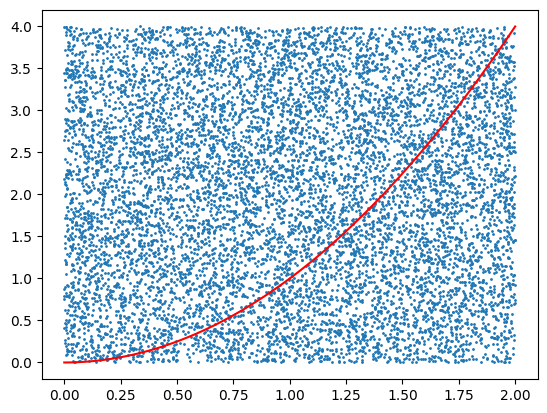

In [13]:
plt.plot(x, y, 'o', markersize = 1)  # Genera los puntitos azules (son las x e y simuladas)
plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), 'r') # Genera la curva teórica de la funcion
plt.show()

In [14]:
np.linspace(a, b, 100)

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

## Actividades de clase





## Actividad 1: Valor esperado, juego de volados

El valor esperado, de una variable aleatoria X

E(X)

Es la idea que formaliza la idea de valor medio de un fenómeno aleatorio. Es un concepto análogo a la media aritmética de un conjunto de datos. Cuando la variable aleatoria es discreta, la esperanza es igual a la suma de la probabilidad de cada posible suceso aleatorio multiplicado por el valor de dicho suceso.

Crea código que a través de Montecarlo estime el valor esperado de un juego de volados

- Elige si quieres ser aguila o sello
- Empiezas con 100 pesos y cada que ganes recibes 10 pesos, cada que pierdas pagas 10 pesos.

Preguntas
1. Al fin de 10 juegos cuánto dinero tienes?
2. Al fin de 100?
3. Y al fin de 1000?
4. Crea una gráfica de líneas que muestre cuánto dinero tenías luego de cada volado (Empiezas teniendo $100 y cómo se va moviendo)
5. Cuál es el valor esperado del juego?
6. Da un ejemplo de otro juego con el mismo valor esperado

In [15]:
salidas = ['Aguila', 'Sello']

In [16]:
volado = np.random.choice(salidas)
volado

'Sello'

Al fin de 10 juegos cuánto dinero tienes?

In [17]:
def apuesta (inicial,n,ganar):
    for i in range(n+1):
        inicial = inicial + np.random.choice(ganar)
    
    return inicial

In [18]:
n=10
acumulado = 100
# Eligo que si sale águila gano 10, si no, pierdo 10
ganar = [10,-10] 

apuesta(acumulado, n, ganar)


90

Al fin de 100?

In [19]:
apuesta(acumulado, 100, ganar)

110

Y al fin de 1,000?

In [20]:
apuesta(acumulado, 1000, ganar)

350

Crea una gráfica de líneas que muestre cuánto dinero tenías luego de cada volado (Empiezas teniendo $100 y cómo se va moviendo)

In [21]:
def apuesta (inicial,n,ganar):
    valores = []
    for i in range(n+1):
        inicial = inicial + np.random.choice(ganar)
        valores.append(inicial)
    
    return np.array(valores)

Text(0, 0.5, 'Dinero del jugador')

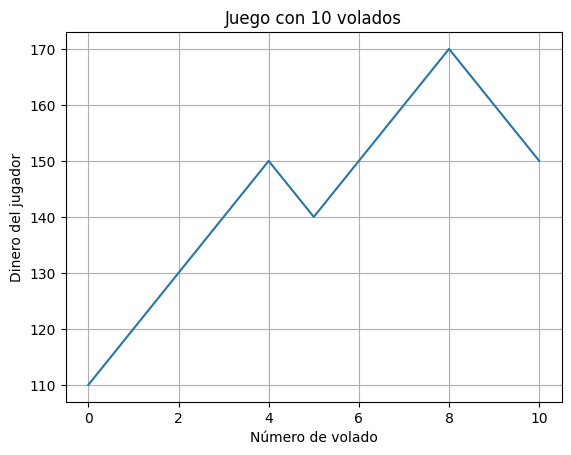

In [22]:
valores10 = apuesta(100,10,ganar)
valores100 = apuesta(100,100,ganar)
valores1000 = apuesta(100,1000,ganar)

plt.plot(valores10)
plt.grid()
plt.title("Juego con 10 volados")
plt.xlabel("Número de volado")
plt.ylabel("Dinero del jugador")

Text(0, 0.5, 'Dinero del jugador')

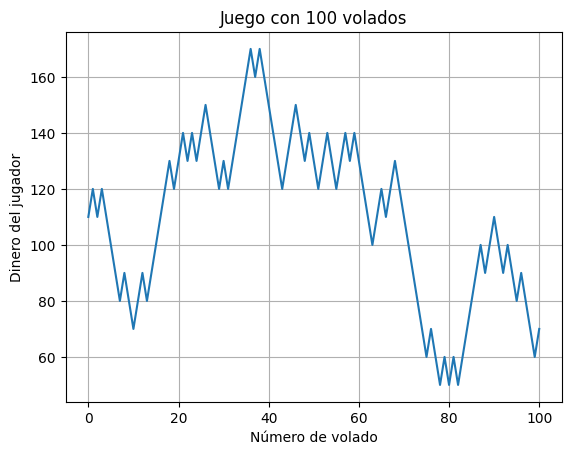

In [23]:
plt.plot(valores100)
plt.grid()
plt.title("Juego con 100 volados")
plt.xlabel("Número de volado")
plt.ylabel("Dinero del jugador")

Text(0, 0.5, 'Dinero del jugador')

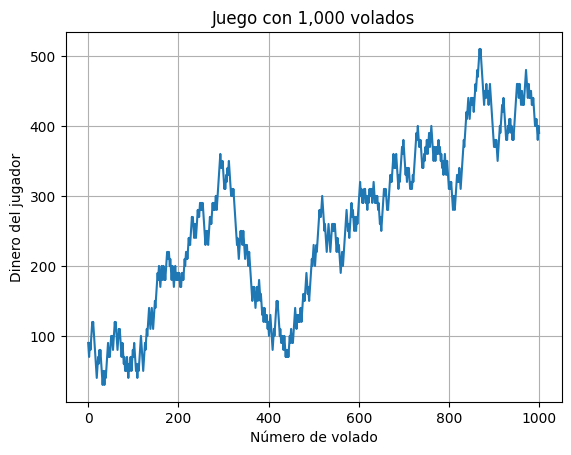

In [24]:
plt.plot(valores1000)
plt.grid()
plt.title("Juego con 1,000 volados")
plt.xlabel("Número de volado")
plt.ylabel("Dinero del jugador")

Cuál es el valor esperado del juego?

In [25]:
e_10 = valores10.mean()
e_100 = valores100.mean()
e_1000 = valores1000.mean()

e_10, e_100, e_1000

(143.63636363636363, 110.1980198019802, 254.7952047952048)

Da un ejemplo de otro juego con el mismo valor esperado

**Pares o nones**

Que le arrancan pelitos a alguien y tiene que decir si el número de pelos es par o non. Existe 50 y 50 de probabilidad de que los pelitos arrancados sean pares o nones.

## Actividad 2: Estimación de Pi usando Montecarlo


- Imagina un círculo inscrito en un cuadrado. El círculo tiene un radio 1 y el cuadrado lado de longitud 2.
- Si eliges un punto al azar dentro del cuadrado, la probabilidad de que caiga dentro del círculo es proporcional al área del círculo dividido por el área del cuadrado.
- El área del círculo de radio 1 es pi x radio al cuadrado = pi y el área del cuadrado es 4. **Por lo tanto, la proporción de puntos que caen dentro del círculo en relación con el total de puntos dentro del cuadrado se aproxima a pi/4**.

### Simulación

- Utilizando Python, genera una serie de puntos aleatorios dentro del cuadrado de lado 2.
- Cuenta cuántos de estos puntos caen dentro del círculo inscrito.
- Utiliza la proporción de puntos que caen dentro del círculo con respecto al total de puntos para estimar pi.

### A entregar

- Usando Matplotlib, visualiza el cuadrado, el círculo y todos los puntos aleatorios que generaste.
- Realiza la simulación con diferentes cantidades de puntos, N (por ejemplo, 10, 100, 1000, 10000, 100000). Muestra tus estimaciones de pi para cada caso y observa cómo la precisión cambia a medida que aumenta N.


In [26]:
import numpy

In [28]:
# Definir el problema y la función
lado_cuadrado = 2
radio_circulo = 1

def cuadrado(n,lado_cuadrado,radio_circulo):
    lista = []
    xs = []
    ys = []
    
    for i in range(n+1):
        x = np.random.uniform(-lado_cuadrado/2,lado_cuadrado/2)
        y = np.random.uniform(-lado_cuadrado/2,lado_cuadrado/2)
        xs.append(x)
        ys.append(y)
        
        if np.sqrt(x**2 + y**2) <= radio_circulo:
            lista.append(1)
        else:
            lista.append(0)
    
    return np.array(lista), np.array([xs,ys])

In [29]:
# Realizar las simulaciones
simulacion_10 = cuadrado(10,lado_cuadrado, radio_circulo)
simulacion_100 = cuadrado(100,lado_cuadrado, radio_circulo)
simulacion_1000 = cuadrado(1000,lado_cuadrado, radio_circulo)
simulacion_10000 = cuadrado(10000,lado_cuadrado, radio_circulo)

Visualización de los resultados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


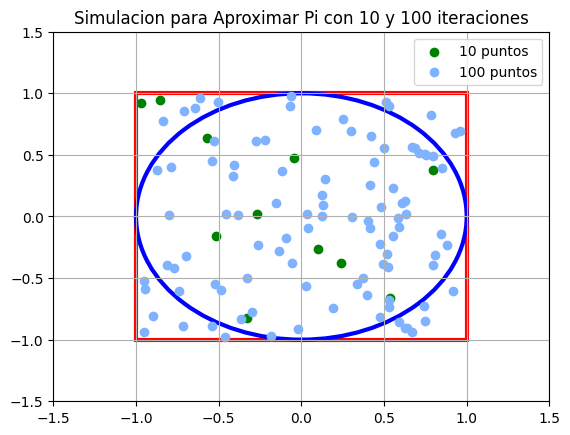

In [30]:
# Con 10 y 100 puntos
fig, ax = plt.subplots()
circunferencia = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none', linewidth=3)
cuadrado = plt.Rectangle((-1, -1), 2, 2, edgecolor='r', facecolor='none', linewidth=3)

ax.add_patch(cuadrado)
ax.add_patch(circunferencia)
plt.scatter(simulacion_10[1][0,:], simulacion_10[1][1,:], c = 'g', alpha = 1, label = '10 puntos')
plt.scatter(simulacion_100[1][0,:], simulacion_100[1][1,:], c = (0.5, 0.7, 1.0), alpha = 1, label = '100 puntos')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.grid()
plt.legend(loc = 'best')
plt.title("Simulacion para Aproximar Pi con 10 y 100 iteraciones")
plt.show()

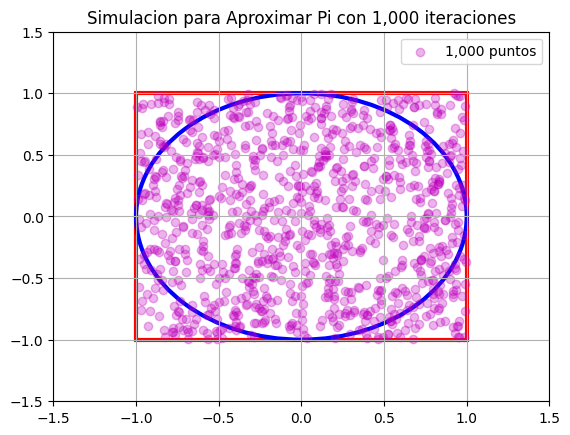

In [31]:
# Con 1,000 puntos
fig, ax = plt.subplots()
circunferencia = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none', linewidth=3)
cuadrado = plt.Rectangle((-1, -1), 2, 2, edgecolor='r', facecolor='none', linewidth=3)

ax.add_patch(cuadrado)
ax.add_patch(circunferencia)

plt.scatter(simulacion_1000[1][0,:], simulacion_1000[1][1,:], c = 'm', alpha = 0.3, label = '1,000 puntos')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.grid()
plt.legend(loc = 'best')
plt.title("Simulacion para Aproximar Pi con 1,000 iteraciones")
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


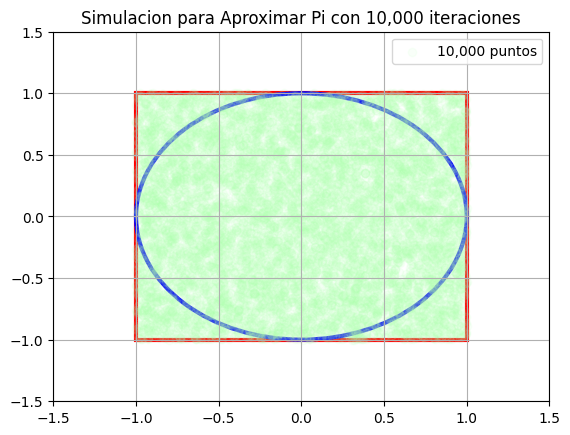

In [32]:
# Con 10,000 puntos
fig, ax = plt.subplots()
circunferencia = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none', linewidth=3)
cuadrado = plt.Rectangle((-1, -1), 2, 2, edgecolor='r', facecolor='none', linewidth=3)

ax.add_patch(cuadrado)
ax.add_patch(circunferencia)

plt.scatter(simulacion_10000[1][0,:], simulacion_10000[1][1,:], c = (0.7, 1.0, 0.7), alpha = 0.08, label = '10,000 puntos')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.grid()
plt.legend(loc = 'best')
plt.title("Simulacion para Aproximar Pi con 10,000 iteraciones")
plt.show()

Ver si los valores de la simulación se aproximan a pi

In [33]:
round(simulacion_10[0].mean()*4,4)

3.2727

In [34]:
round(simulacion_100[0].mean()*4,4)

3.0495

In [35]:
round(simulacion_1000[0].mean()*4,4)

3.1489

In [36]:
round(simulacion_10000[0].mean()*4,4)

3.1389

La simulación aproxima el valor de pi correctamente después de las 1,000 iteraciones, usando 10,000 iteraciones ya da valores muy cercanos a pi. Con 10,000 iteraciones la aproximación a pi no cambia mucho entre simulaciones.